# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [5]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [6]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOS.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00,3.00,0,0,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00,3.00,0,0,0,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55,-0.66,0,0,0,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79,-1.31,0,0,0,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15,-0.03,0,0,0,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21,-0.46,0,0,0,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0


## 정규화 할 list 나누기

In [7]:
dummy_list = []
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [8]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_TEMP", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE"])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D',
 'ASOS_RAIN_CUM',
 'ASOS_TEMP',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE']

In [9]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0


In [10]:
plant = plant.drop(['COND_LOC'], axis=1)
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,0,0,0,-0.736579,-1.012161,-0.617242,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.831941,0.644152,-0.655778,-0.185364,-0.852154,0.938951,0.161914,0.718819,0.709988,-0.635240,2.016265,1.752256,0,1,0,1,0
349313,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,0,0,0,-0.812784,-0.930646,-0.628125,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,

## test_data validation & 정규화 preprocessing

In [11]:
test_data = pd.read_csv("data/31.finaldata_plant/test_wsASOS.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,3.97,-1.93,0,0,0,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,3.94,-0.76,0,0,0,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,-2.81,0.38,0,0,0,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0.00,1.46,0,0,0,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,-0.73,2.52,0,0,0,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,4.45,-2.57,0,0,0,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,7.76,-2.55,0,0,0,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,2.84,-1.93,0,0,0,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0,-1.6,0.0,59.1,1.5,1020.5,1023.7,90.4,0.05,60.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0.64,1.34,0,0,0,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0,12.2,0.0,307.5,1.1,1019.4,1022.5,36.8,8.33,16260.0


In [12]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,0,1,0,0,1
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,1,0,0,1,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,0,1,0,0,1
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,1,0,1,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0,1,1,0,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [13]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0.0,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
1,0.0,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0
2,0.0,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,0,1
3,0.0,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,1,0,0
4,0.0,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,1,0,0,1,0


In [14]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [16]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## Random UnderSampling
-- Sampling 변수를 잘 확인해야함

In [17]:
from imblearn.under_sampling import *

In [18]:
rus = RandomUnderSampler(random_state=42)

In [19]:
X_undersampled24, y_undersampled24 = rus.fit_resample(X_train, y_train24)
X_undersampled48, y_undersampled48 = rus.fit_resample(X_train, y_train48)

## test_data 만들기

In [20]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

In [21]:
test_X

,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,0,1,0,0,1
1,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,1,0,0,1,0
2,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,0,1,0,0,1
3,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,1,0,1,0,0
4,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,0,0,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,0.636848,0.646940,-0.201451,-1.165727,-0.605992,-0.887058,0.974582,-0.892155,1.178701,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.722919,-0.880800,0.781830,-1.866349,-0.243312,-1.397515,-0.829795,-0.846727,0.667230,0.675460,0.311711,-0.837019,-0.818964,1,0,0,1,0
3535,0,0,0,-0.823010,-1.167179,-0.459468,-1.312941,0.436104,0.660368,0.670221,-0.201451,-1.303176,-0.917026,-1.027651,-0.307913,-1.214922,0.036638,-1.535644,0.720434,0.694610,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,-1.677595,-0.269399,1.263465,-0.014602,-0.911930,0.687035,-1.459530,-0.816577,2.046987,-1.854176,-0.243312,-1.461128,1.526116,-0.911889,0.679121,0.687200,0.549800,-0.837019,-0.818964,0,1,0,0,1
3536,0,0,0,-1.060959,-0.733598,-0.762821,-1.010180,-0.384036,0.730928,0.740064,-0.201451,-1.375942,-0.628209,-0.686211,-0.074928,-0.792842,-0.157332,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,-1.461284,-0.341934,1.263465,-0.014602,-0.945870,0.768898,-1.722919,-0.862851,0.166451,-1.476814,-0.243312,-1.482332,-0.734205,-0.195108,0.738575,0.745901,0.816459,-0.830675,-0.814508,0,1,1,0,0
3537,0,0,0,-0.313449,-1.554590,

# Random Forest
## 24시간 후 결로 예측

### UnderSampling

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
y_pred_under24 = rf_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.14      0.97      0.24       594

    accuracy                           0.97    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.97      0.98    104796



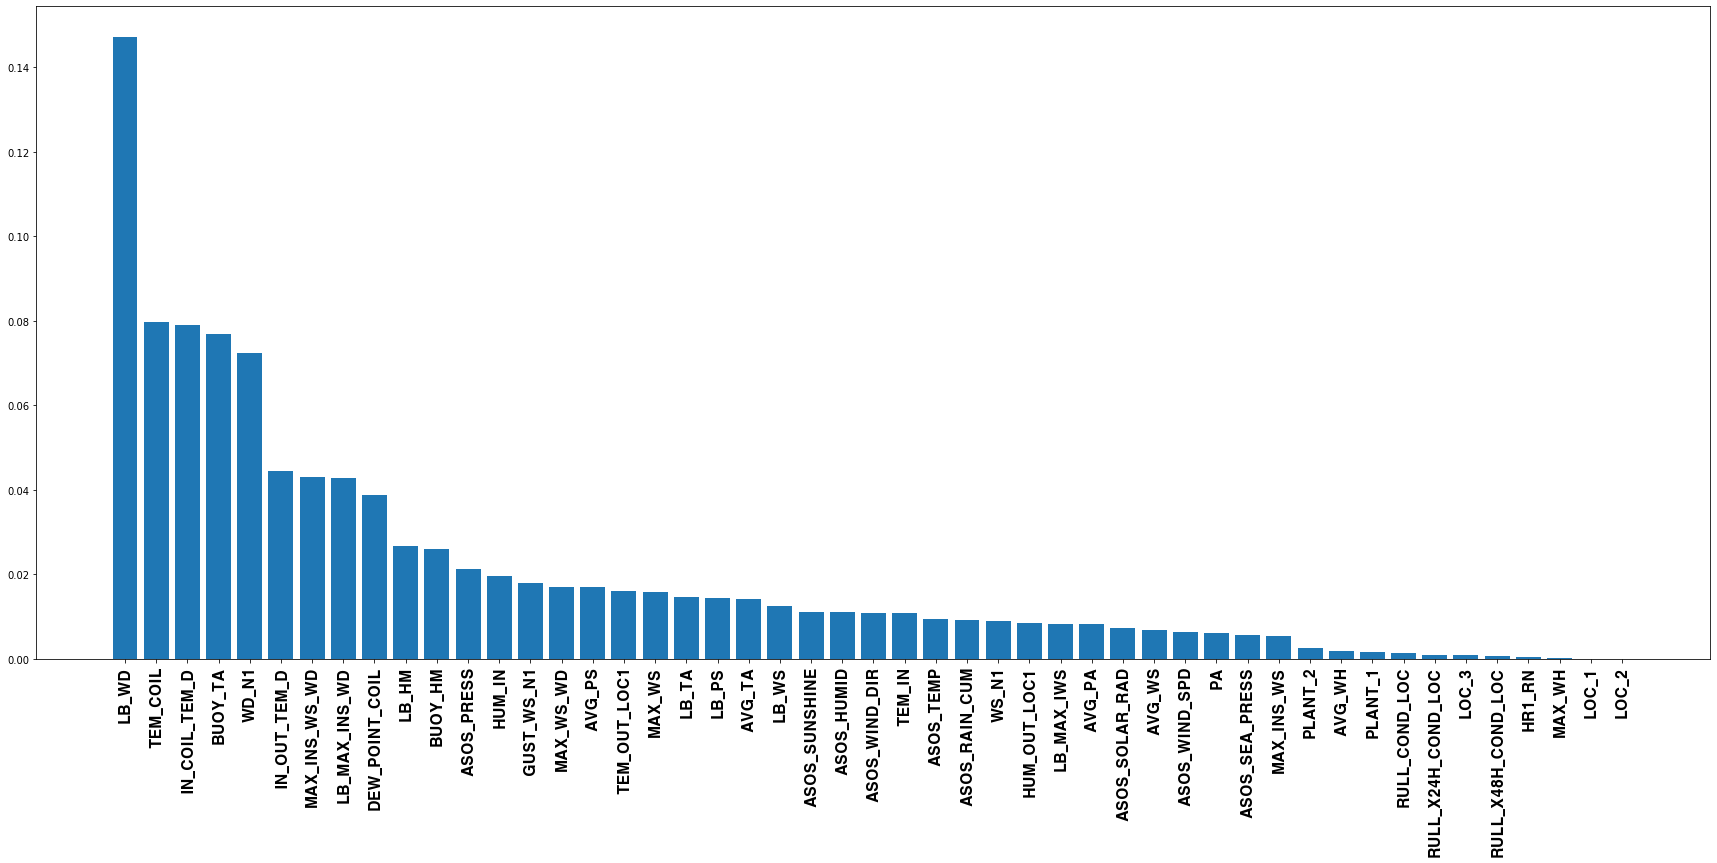

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [57]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under24.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
7,HUM_OUT_LOC1,0.00850758
28,LB_MAX_IWS,0.00831986
8,AVG_PA,0.00810995
42,ASOS_SOLAR_RAD,0.00738076
12,AVG_WS,0.00668031
38,ASOS_WIND_SPD,0.00621644
20,PA,0.00608677
40,ASOS_SEA_PRESS,0.00555724
15,MAX_INS_WS,0.00538599
45,PLANT_2,0.0024431


## 48시간 결로 예측

### UnderSampling

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
y_pred_under48 = rf_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.15      0.97      0.27       594

    accuracy                           0.97    104796
   macro avg       0.58      0.97      0.63    104796
weighted avg       1.00      0.97      0.98    104796



## 변수 중요도

In [64]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under48.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
7,HUM_OUT_LOC1,0.0102375
35,ASOS_RAIN_CUM,0.00999026
33,IN_OUT_TEM_D,0.0083394
15,MAX_INS_WS,0.00833478
42,ASOS_SOLAR_RAD,0.00788944
18,WS_N1,0.00633196
14,MAX_WS_WD,0.0048578
38,ASOS_WIND_SPD,0.00460685
37,ASOS_WIND_DIR,0.00441743
10,HR1_RN,0.00421556


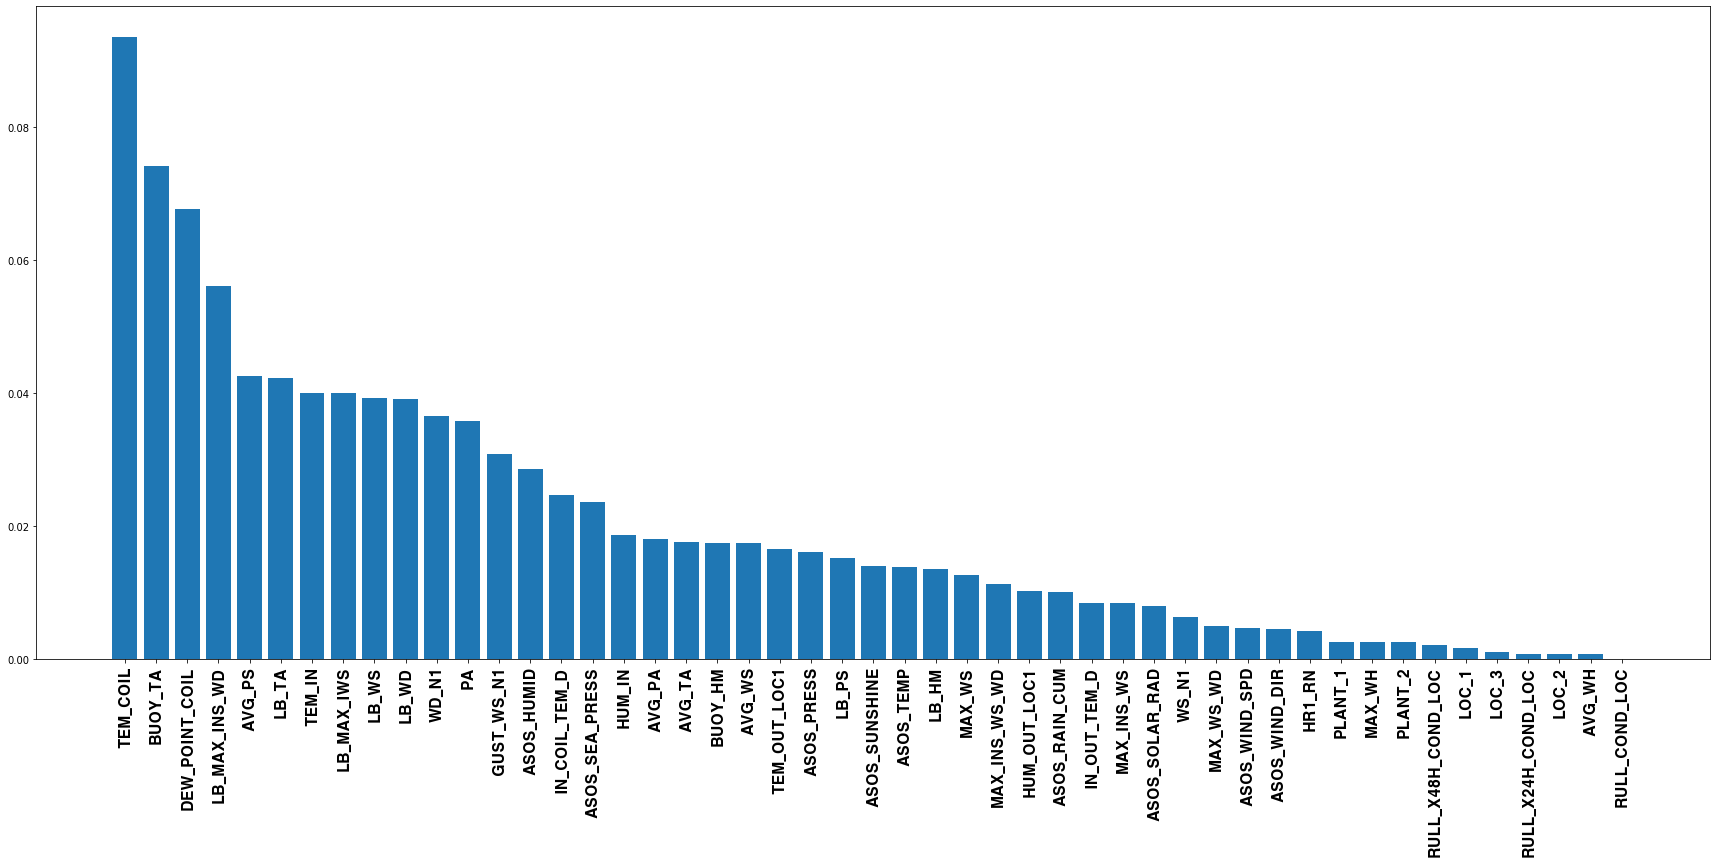

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under48_df.variable, rf_clf_under48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [26]:
validation = etl.makeValiation(test_data, rf_clf_under24, rf_clf_under48, test_X)
validation

C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,20
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,10,2019-04-03 10:30:00,0,30
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,10,2019-04-03 11:00:00,0,20
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,30
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,10
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,10
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,10
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,10,2020-03-31 11:30:00,0,10


In [27]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
248,2019-04-27 21:30:00,1,2,2019-04-28 21:30:00,1,60,2019-04-29 21:30:00,0,10
1969,2019-11-16 02:00:00,1,3,2019-11-17 02:00:00,1,60,2019-11-18 02:00:00,0,20
1970,2019-11-16 02:30:00,1,2,2019-11-17 02:30:00,1,60,2019-11-18 02:30:00,0,30
1975,2019-11-16 11:30:00,1,3,2019-11-17 11:30:00,1,70,2019-11-18 11:30:00,0,30
1976,2019-11-16 14:00:00,1,2,2019-11-17 14:00:00,1,70,2019-11-18 14:00:00,0,20
...,...,...,...,...,...,...,...,...,...
3281,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,100,2020-03-05 11:00:00,0,20
3312,2020-03-07 10:30:00,2,1,2020-03-08 10:30:00,1,60,2020-03-09 10:30:00,0,30
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,70,2020-03-27 20:00:00,0,20
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,60,2020-03-28 15:00:00,0,20


In [28]:
etl.findCondRow(validation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
11,2019-04-02 12:30:00,1,2,2019-04-03 12:30:00,0,0,2019-04-04 12:30:00,1,60
150,2019-04-16 14:30:00,2,3,2019-04-17 14:30:00,0,30,2019-04-18 14:30:00,1,60
189,2019-04-21 02:30:00,2,1,2019-04-22 02:30:00,0,0,2019-04-23 02:30:00,1,60
209,2019-04-23 04:30:00,2,2,2019-04-24 04:30:00,0,0,2019-04-25 04:30:00,1,60
210,2019-04-23 07:30:00,1,1,2019-04-24 07:30:00,0,10,2019-04-25 07:30:00,1,70
...,...,...,...,...,...,...,...,...,...
3333,2020-03-09 11:30:00,1,2,2020-03-10 11:30:00,0,40,2020-03-11 11:30:00,1,90
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,0,50,2020-03-11 12:00:00,1,80
3362,2020-03-12 00:00:00,2,3,2020-03-13 00:00:00,0,10,2020-03-14 00:00:00,1,80
3372,2020-03-12 21:00:00,1,1,2020-03-13 21:00:00,0,10,2020-03-14 21:00:00,1,60


# LightGBM
## 24 시간 결로 예측

### UnderSampling

In [30]:
from lightgbm import LGBMClassifier
lgbm_clf_under24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under24.fit(X_undersampled24, y_undersampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled24, y_undersampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_under24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.969484	training's binary_logloss: 0.624137	valid_1's auc: 0.952873	valid_1's binary_logloss: 0.626691
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.974688	training's binary_logloss: 0.566696	valid_1's auc: 0.962296	valid_1's binary_logloss: 0.571588
[3]	training's auc: 0.977213	training's binary_logloss: 0.518271	valid_1's auc: 0.965784	valid_1's binary_logloss: 0.525769
[4]	training's auc: 0.977354	training's binary_logloss: 0.477342	valid_1's auc: 0.965472	valid_1's binary_logloss: 0.487142
[5]	training's auc: 0.978455	training's binary_logloss: 0.442867	valid_1's auc: 0.96725	valid_1's binary_logloss: 0.454664
[6]	training's auc: 0.980101	training's binary_logloss: 0.411327	valid_1's auc: 0.969145	valid_1's binary_logloss: 0.425424
[7]	training's auc: 0.981087	training's binary_logloss: 0.385155	valid_1's auc: 0.970652	valid_1's binary_logloss: 0.401213
[8]	training's auc: 0.981868	training's binary_logloss: 0.361367	valid_

[74]	training's auc: 1	training's binary_logloss: 0.0201683	valid_1's auc: 0.993784	valid_1's binary_logloss: 0.106048
[75]	training's auc: 1	training's binary_logloss: 0.019492	valid_1's auc: 0.993792	valid_1's binary_logloss: 0.105446
[76]	training's auc: 1	training's binary_logloss: 0.0187364	valid_1's auc: 0.993884	valid_1's binary_logloss: 0.105482
[77]	training's auc: 1	training's binary_logloss: 0.0179339	valid_1's auc: 0.993899	valid_1's binary_logloss: 0.105038
[78]	training's auc: 1	training's binary_logloss: 0.0172629	valid_1's auc: 0.994034	valid_1's binary_logloss: 0.104187
[79]	training's auc: 1	training's binary_logloss: 0.0166521	valid_1's auc: 0.99405	valid_1's binary_logloss: 0.104482
[80]	training's auc: 1	training's binary_logloss: 0.0159504	valid_1's auc: 0.994134	valid_1's binary_logloss: 0.103867
[81]	training's auc: 1	training's binary_logloss: 0.0153038	valid_1's auc: 0.994229	valid_1's binary_logloss: 0.104199
[82]	training's auc: 1	training's binary_logloss: 

[162]	training's auc: 1	training's binary_logloss: 0.000715354	valid_1's auc: 0.995048	valid_1's binary_logloss: 0.107109
[163]	training's auc: 1	training's binary_logloss: 0.000691119	valid_1's auc: 0.995055	valid_1's binary_logloss: 0.107687
[164]	training's auc: 1	training's binary_logloss: 0.000663891	valid_1's auc: 0.995053	valid_1's binary_logloss: 0.107623
[165]	training's auc: 1	training's binary_logloss: 0.000636034	valid_1's auc: 0.995058	valid_1's binary_logloss: 0.108016
[166]	training's auc: 1	training's binary_logloss: 0.000617164	valid_1's auc: 0.99508	valid_1's binary_logloss: 0.108198
[167]	training's auc: 1	training's binary_logloss: 0.000593522	valid_1's auc: 0.995114	valid_1's binary_logloss: 0.108289
[168]	training's auc: 1	training's binary_logloss: 0.000571076	valid_1's auc: 0.995112	valid_1's binary_logloss: 0.108299
[169]	training's auc: 1	training's binary_logloss: 0.000552862	valid_1's auc: 0.995122	valid_1's binary_logloss: 0.108666
[170]	training's auc: 1	t

In [31]:
y_pred_under24 = lgbm_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.98      0.23       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.60    104796
weighted avg       0.99      0.96      0.98    104796



### 변수 중요도

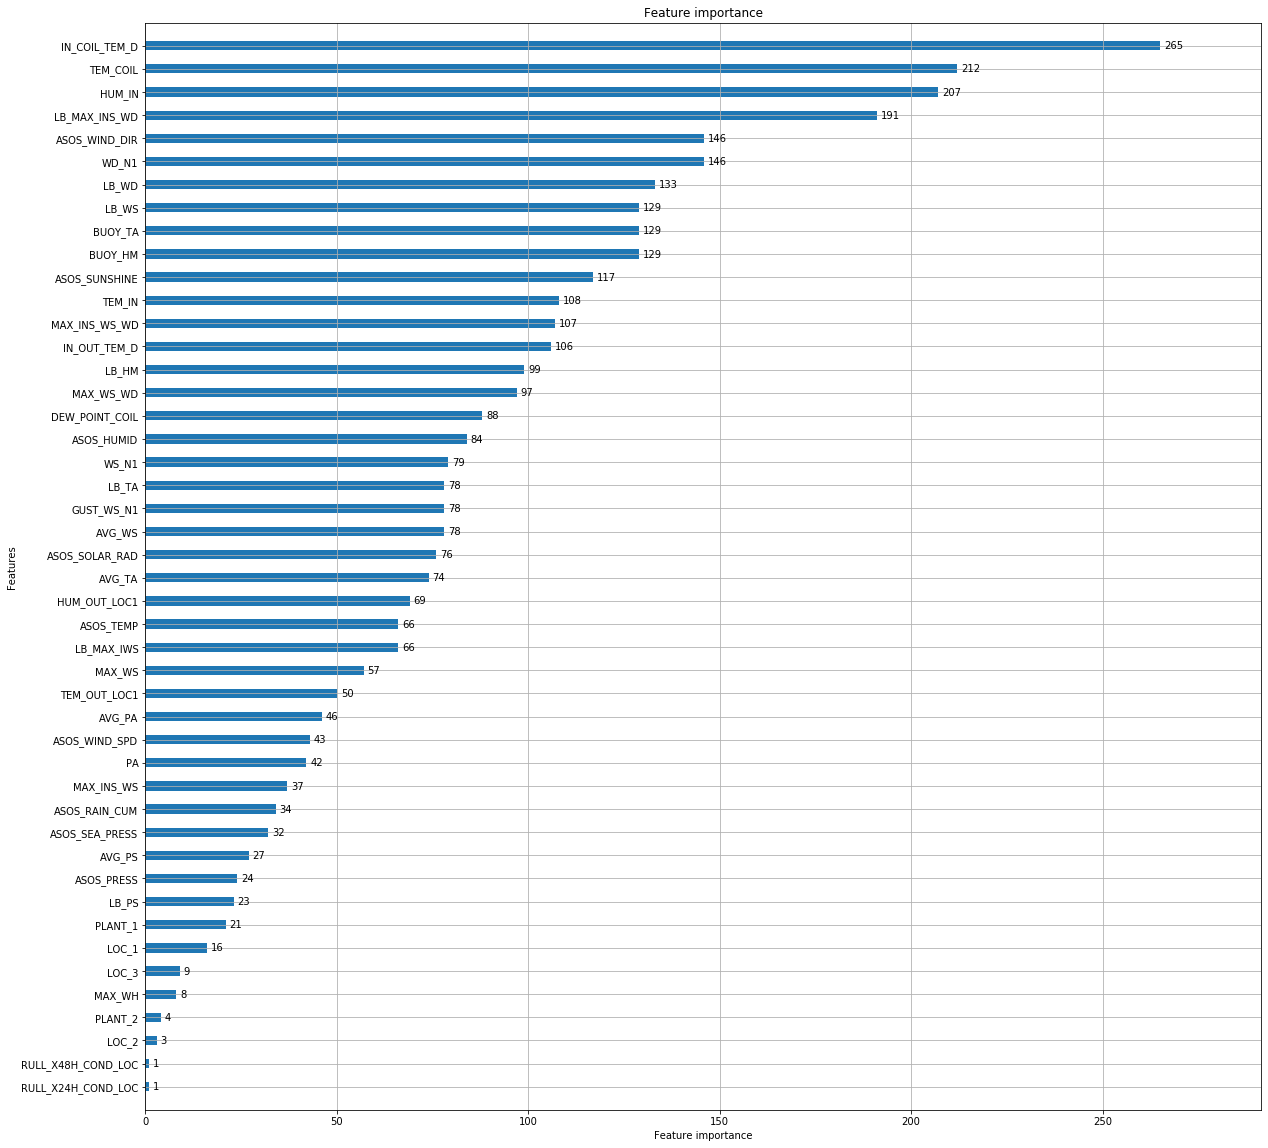

In [45]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [47]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df.tail(20)

,variable,importance
8,AVG_PA,46
38,ASOS_WIND_SPD,43
20,PA,42
15,MAX_INS_WS,37
35,ASOS_RAIN_CUM,34
40,ASOS_SEA_PRESS,32
9,AVG_PS,27
39,ASOS_PRESS,24
30,LB_PS,23
44,PLANT_1,21


## 48 시간 결로 예측

### UnderSampling

In [32]:
from lightgbm import LGBMClassifier
lgbm_clf_under48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under48.fit(X_undersampled48, y_undersampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled48, y_undersampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_under48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.953544	training's binary_logloss: 0.631005	valid_1's auc: 0.939181	valid_1's binary_logloss: 0.633476
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.968144	training's binary_logloss: 0.577085	valid_1's auc: 0.956599	valid_1's binary_logloss: 0.581824
[3]	training's auc: 0.96821	training's binary_logloss: 0.534055	valid_1's auc: 0.954383	valid_1's binary_logloss: 0.542372
[4]	training's auc: 0.971137	training's binary_logloss: 0.495574	valid_1's auc: 0.958238	valid_1's binary_logloss: 0.504951
[5]	training's auc: 0.972434	training's binary_logloss: 0.462633	valid_1's auc: 0.959395	valid_1's binary_logloss: 0.475055
[6]	training's auc: 0.977139	training's binary_logloss: 0.433885	valid_1's auc: 0.963284	valid_1's binary_logloss: 0.450076
[7]	training's auc: 0.979921	training's binary_logloss: 0.404825	valid_1's auc: 0.966865	valid_1's binary_logloss: 0.422982
[8]	training's auc: 0.983888	training's binary_logloss: 0.377311	valid_

[69]	training's auc: 1	training's binary_logloss: 0.0301287	valid_1's auc: 0.993855	valid_1's binary_logloss: 0.12091
[70]	training's auc: 1	training's binary_logloss: 0.0289514	valid_1's auc: 0.993954	valid_1's binary_logloss: 0.119967
[71]	training's auc: 1	training's binary_logloss: 0.0279286	valid_1's auc: 0.993987	valid_1's binary_logloss: 0.119383
[72]	training's auc: 1	training's binary_logloss: 0.0270537	valid_1's auc: 0.994015	valid_1's binary_logloss: 0.119371
[73]	training's auc: 1	training's binary_logloss: 0.026324	valid_1's auc: 0.993964	valid_1's binary_logloss: 0.119603
[74]	training's auc: 1	training's binary_logloss: 0.0253201	valid_1's auc: 0.994035	valid_1's binary_logloss: 0.118837
[75]	training's auc: 1	training's binary_logloss: 0.0243458	valid_1's auc: 0.994146	valid_1's binary_logloss: 0.117897
[76]	training's auc: 1	training's binary_logloss: 0.0234614	valid_1's auc: 0.994228	valid_1's binary_logloss: 0.116782
[77]	training's auc: 1	training's binary_logloss: 

[138]	training's auc: 1	training's binary_logloss: 0.00282899	valid_1's auc: 0.995457	valid_1's binary_logloss: 0.108225
[139]	training's auc: 1	training's binary_logloss: 0.00274551	valid_1's auc: 0.995459	valid_1's binary_logloss: 0.108614
[140]	training's auc: 1	training's binary_logloss: 0.00267267	valid_1's auc: 0.995469	valid_1's binary_logloss: 0.108905
[141]	training's auc: 1	training's binary_logloss: 0.00257868	valid_1's auc: 0.995486	valid_1's binary_logloss: 0.109311
[142]	training's auc: 1	training's binary_logloss: 0.00248783	valid_1's auc: 0.995503	valid_1's binary_logloss: 0.109463
[143]	training's auc: 1	training's binary_logloss: 0.0024143	valid_1's auc: 0.995493	valid_1's binary_logloss: 0.109574
[144]	training's auc: 1	training's binary_logloss: 0.00234691	valid_1's auc: 0.995476	valid_1's binary_logloss: 0.109998
[145]	training's auc: 1	training's binary_logloss: 0.00227205	valid_1's auc: 0.995539	valid_1's binary_logloss: 0.109759
[146]	training's auc: 1	training'

[205]	training's auc: 1	training's binary_logloss: 0.00031659	valid_1's auc: 0.996217	valid_1's binary_logloss: 0.120746
[206]	training's auc: 1	training's binary_logloss: 0.000307726	valid_1's auc: 0.996215	valid_1's binary_logloss: 0.121202
[207]	training's auc: 1	training's binary_logloss: 0.000297555	valid_1's auc: 0.996229	valid_1's binary_logloss: 0.121382
[208]	training's auc: 1	training's binary_logloss: 0.000288611	valid_1's auc: 0.996239	valid_1's binary_logloss: 0.121704
[209]	training's auc: 1	training's binary_logloss: 0.00027994	valid_1's auc: 0.996212	valid_1's binary_logloss: 0.12203
[210]	training's auc: 1	training's binary_logloss: 0.00027119	valid_1's auc: 0.996237	valid_1's binary_logloss: 0.12217
[211]	training's auc: 1	training's binary_logloss: 0.000262014	valid_1's auc: 0.996239	valid_1's binary_logloss: 0.122454
[212]	training's auc: 1	training's binary_logloss: 0.000253218	valid_1's auc: 0.996266	valid_1's binary_logloss: 0.122606
[213]	training's auc: 1	train

In [33]:
y_pred_under48 = lgbm_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.98      0.22       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.60    104796
weighted avg       0.99      0.96      0.98    104796



### 변수 중요도

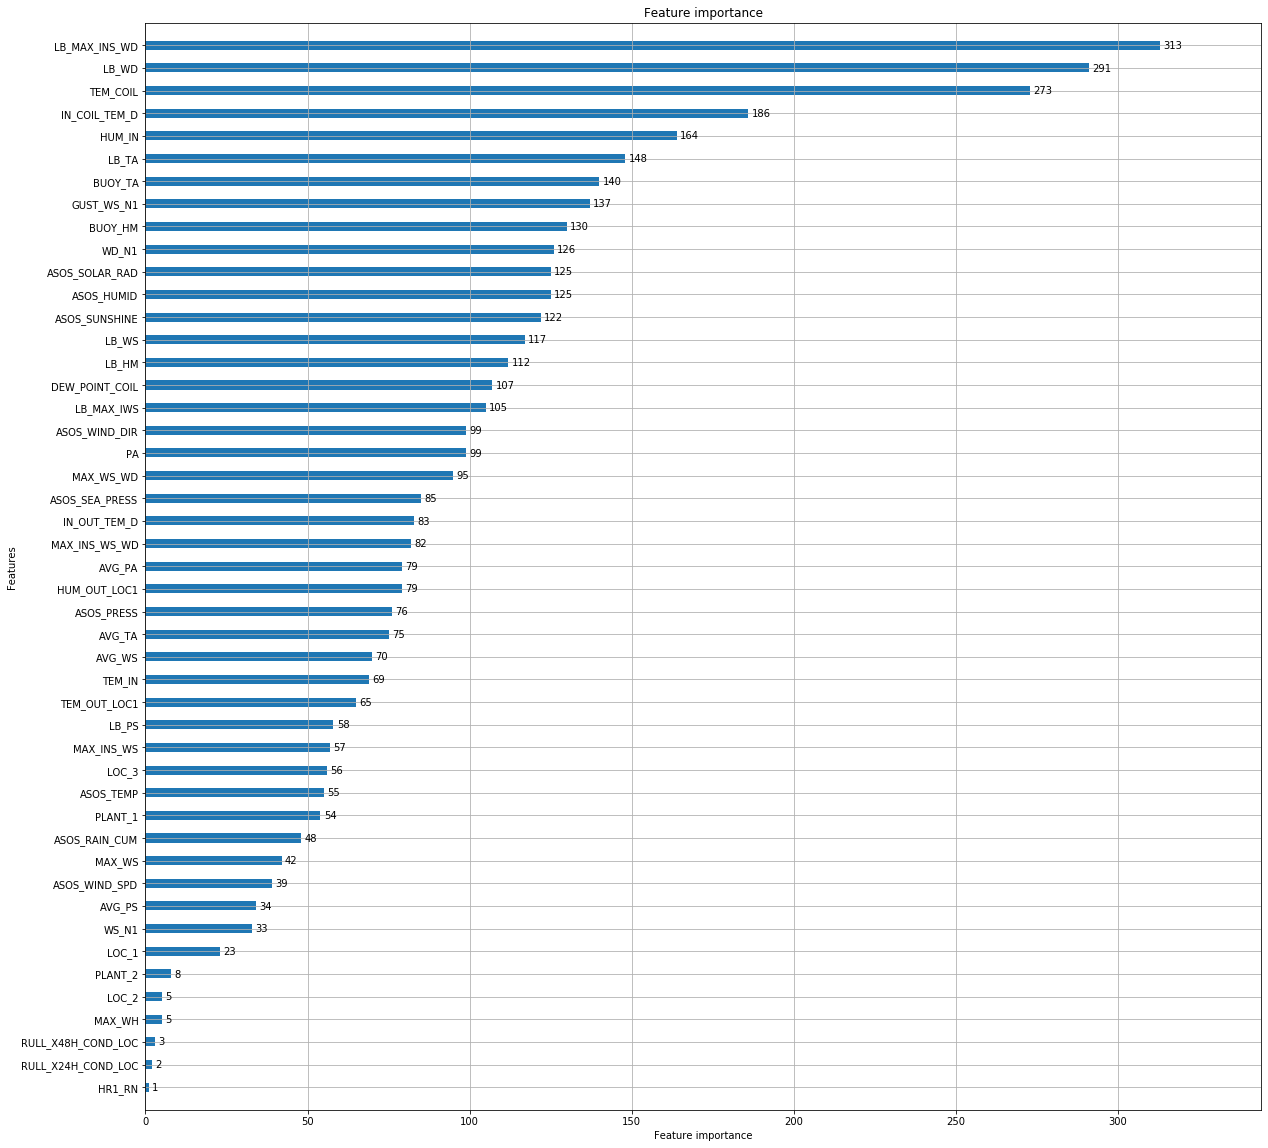

In [48]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [51]:
lgbm_model48_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under48.feature_importances_], columns=['variable', 'importance'])
lgbm_model48_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model48_df.tail(20)

,variable,importance
6,TEM_OUT_LOC1,65
30,LB_PS,58
15,MAX_INS_WS,57
48,LOC_3,56
36,ASOS_TEMP,55
44,PLANT_1,54
35,ASOS_RAIN_CUM,48
13,MAX_WS,42
38,ASOS_WIND_SPD,39
9,AVG_PS,34


## 검증값 만들기

In [34]:
lgValiation =etl.makeValiation(test_data,lgbm_clf_under24,lgbm_clf_under48, test_X)
lgValiation

C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Wheather_Bigdata\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,5
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,3
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,11
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,1,2020-03-31 11:30:00,0,0


In [36]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,68,2019-11-17 19:00:00,1,95
1947,2019-11-15 22:30:00,1,2,2019-11-16 22:30:00,1,76,2019-11-17 22:30:00,0,46
1949,2019-11-15 23:00:00,2,1,2019-11-16 23:00:00,1,57,2019-11-17 23:00:00,0,34
1950,2019-11-15 23:00:00,1,2,2019-11-16 23:00:00,1,77,2019-11-17 23:00:00,0,36
1954,2019-11-15 23:30:00,1,2,2019-11-16 23:30:00,1,87,2019-11-17 23:30:00,0,15
...,...,...,...,...,...,...,...,...,...
3208,2020-02-24 16:00:00,1,1,2020-02-25 16:00:00,1,90,2020-02-26 16:00:00,0,6
3209,2020-02-25 00:30:00,1,3,2020-02-26 00:30:00,1,89,2020-02-27 00:30:00,0,17
3281,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,87,2020-03-05 11:00:00,0,23
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,60,2020-03-11 12:00:00,0,35


In [37]:
etl.findCondRow(lgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
61,2019-04-07 00:30:00,2,2,2019-04-08 00:30:00,0,5,2019-04-09 00:30:00,1,78
169,2019-04-19 00:30:00,1,3,2019-04-20 00:30:00,0,1,2019-04-21 00:30:00,1,51
718,2019-06-18 07:00:00,1,3,2019-06-19 07:00:00,0,2,2019-06-20 07:00:00,1,50
1935,2019-11-15 15:30:00,2,1,2019-11-16 15:30:00,0,34,2019-11-17 15:30:00,1,61
1936,2019-11-15 16:00:00,1,2,2019-11-16 16:00:00,0,40,2019-11-17 16:00:00,1,71
...,...,...,...,...,...,...,...,...,...
3285,2020-03-03 20:00:00,2,2,2020-03-04 20:00:00,0,0,2020-03-05 20:00:00,1,69
3288,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,1,2020-03-05 22:30:00,1,63
3419,2020-03-18 16:30:00,2,2,2020-03-19 16:30:00,0,8,2020-03-20 16:30:00,1,72
3442,2020-03-21 11:00:00,1,2,2020-03-22 11:00:00,0,18,2020-03-23 11:00:00,1,50


In [427]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

### UnderSamplingmm

In [38]:
from xgboost import XGBClassifier

xgb_clf_under24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under24.fit(X_undersampled24, y_undersampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-logloss:0.62071
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.56068
[2]	validation_0-logloss:0.51046
[3]	validation_0-logloss:0.46748
[4]	validation_0-logloss:0.42968
[5]	validation_0-logloss:0.39783
[6]	validation_0-logloss:0.37026
[7]	validation_0-logloss:0.34614
[8]	validation_0-logloss:0.32504
[9]	validation_0-logloss:0.30558
[10]	validation_0-logloss:0.28867
[11]	validation_0-logloss:0.27314
[12]	validation_0-logloss:0.25939
[13]	validation_0-logloss:0.24713
[14]	validation_0-logloss:0.23704
[15]	validation_0-logloss:0.22672
[16]	validation_0-logloss:0.21763
[17]	validation_0-logloss:0.20983
[18]	validation_0-logloss:0.20278
[19]	validation_0-logloss:0.19594
[20]	validation_0-logloss:0.18953
[21]	validation_0-logloss:0.18480
[22]	validation_0-logloss:0.17939
[23]	validation_0-logloss:0.17499
[24]	validation_0-logloss:0.16949
[25]	validation_0-logloss:0.16570
[26]	validation_0-logloss:0.16320
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [41]:
y_pred_under24 = xgb_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.11      0.98      0.20       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



### 변수 중요도

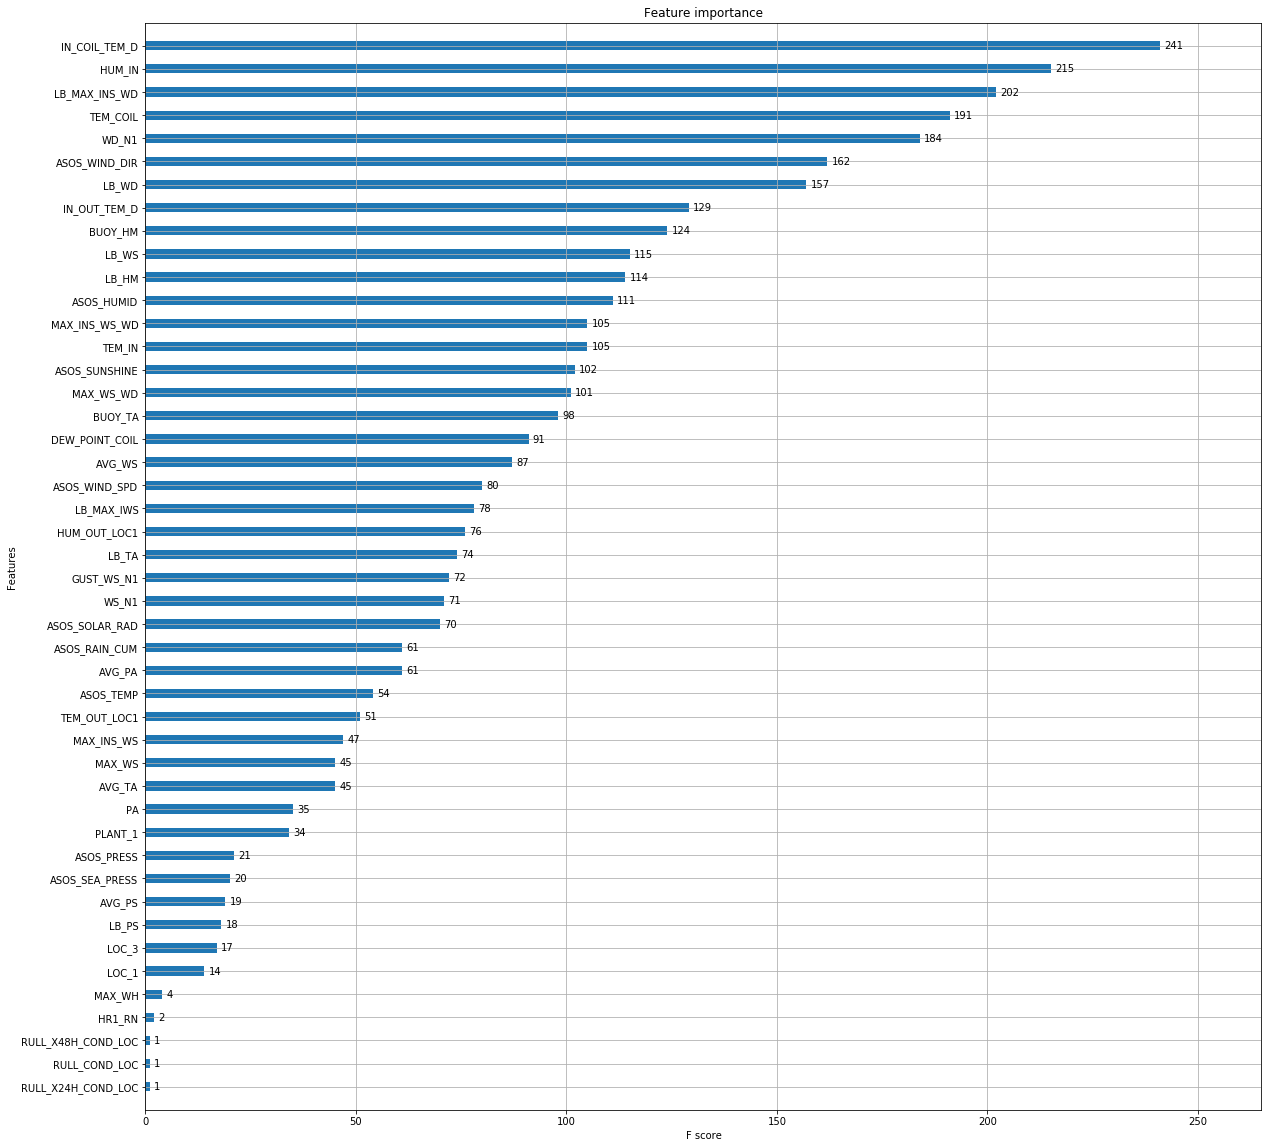

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [52]:
xgb_clf_under24_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under24.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under24_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under24_df.tail(20)

,variable,importance
31,LB_HM,0.0105147
21,BUOY_HM,0.0104134
14,MAX_WS_WD,0.0103724
32,DEW_POINT_COIL,0.0102792
36,ASOS_TEMP,0.0102519
7,HUM_OUT_LOC1,0.00985022
12,AVG_WS,0.00893845
19,GUST_WS_N1,0.00872521
33,IN_OUT_TEM_D,0.00859749
20,PA,0.0083471


## 48 시간 결로 예측

### UnderSampling


In [42]:
from xgboost import XGBClassifier

xgb_clf_under48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under48.fit(X_undersampled48, y_undersampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


[0]	validation_0-logloss:0.62664
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.57282
[2]	validation_0-logloss:0.52805
[3]	validation_0-logloss:0.48883
[4]	validation_0-logloss:0.45127
[5]	validation_0-logloss:0.42508
[6]	validation_0-logloss:0.39744
[7]	validation_0-logloss:0.37258
[8]	validation_0-logloss:0.35044
[9]	validation_0-logloss:0.33104
[10]	validation_0-logloss:0.31348
[11]	validation_0-logloss:0.29749
[12]	validation_0-logloss:0.28396
[13]	validation_0-logloss:0.27138
[14]	validation_0-logloss:0.26009
[15]	validation_0-logloss:0.25016
[16]	validation_0-logloss:0.24005
[17]	validation_0-logloss:0.23221
[18]	validation_0-logloss:0.22480
[19]	validation_0-logloss:0.21754
[20]	validation_0-logloss:0.21043
[21]	validation_0-logloss:0.20498
[22]	validation_0-logloss:0.19892
[23]	validation_0-logloss:0.19435
[24]	validation_0-logloss:0.18993
[25]	validation_0-logloss:0.18498
[26]	validation_0-logloss:0.18196
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [44]:
y_pred_under48 = xgb_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.12      0.99      0.22       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.60    104796
weighted avg       0.99      0.96      0.98    104796



### 변수 중요도

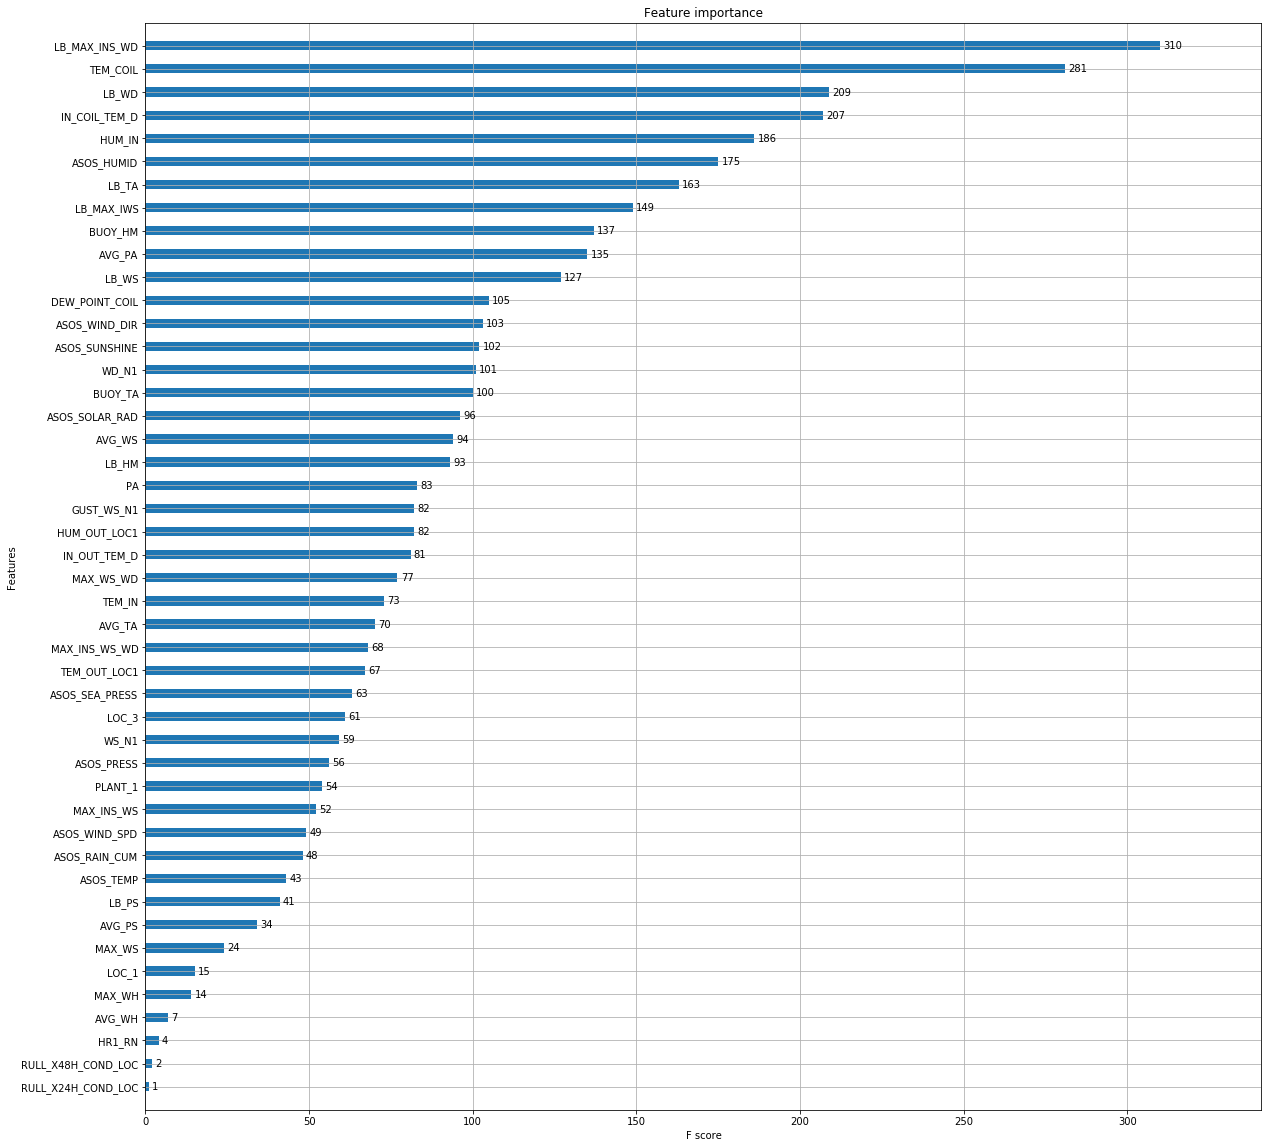

In [53]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [54]:
xgb_clf_under48_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under48.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under48_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under48_df.tail(20)

,variable,importance
38,ASOS_WIND_SPD,0.0123644
10,HR1_RN,0.011199
18,WS_N1,0.0111026
43,ASOS_SUNSHINE,0.0109239
46,LOC_1,0.0107893
42,ASOS_SOLAR_RAD,0.0101466
14,MAX_WS_WD,0.00976803
21,BUOY_HM,0.00943994
13,MAX_WS,0.00911559
30,LB_PS,0.00874737


## 검증 값 만들기

In [ ]:
xgValiation= etl.makeValiation(test_data, xgb_clf_under24, xgb_clf_under48, test_X)
xgValiation

In [ ]:
findCondRow24(xgValiation)

In [ ]:
findCondRow48(xgValiation)

In [ ]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

In [ ]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

## 48시간 결로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

In [ ]:
knnValiation=makeValiation(neigh24,neigh48)
knnValiation

In [ ]:
findCondRow24(knnValiation)

In [ ]:
findCondRow48(knnValiation)